## We are going to explore the factors that influence the prices of cars in Kenya. Our dataset has been scraped from a used cars website.
## We want to know:
  1. which variables are significant in predicting the price of a car
  2. how well those variables describe the price of a car

In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
#Reading and understanding the data
cars=pd.read_csv("/media/duncan/New Volume/Projects/scrape/cars.csv")
cars.head()

,Car Title,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,"Ksh. 1,708,980",Duty not paid,Japan,Petrol,Automatic,3400 Km,660 cc,4WD
1,Honda VEZEL 2016,"Ksh. 1,925,730",Duty not paid,Japan,Petrol,Automatic,28000 Km,1500 cc,Unknown
2,Volvo XC40 2018,"Ksh. 5,513,650",Duty not paid,Japan,Petrol,Automatic,25000 Km,2000 cc,4WD
3,Toyota Hiace Van 2015,"Ksh. 3,225,870",Duty not paid,Japan,Diesel,Automatic,104000 Km,3000 cc,2WD
4,Toyota Sienna 2019,"Ksh. 6,365,780",Duty not paid,Japan,Petrol,Automatic,33000 Km,3500 cc,2WD


In [7]:
cars.shape

(9996, 9)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Car Title        9996 non-null   object
 1   Price            9996 non-null   object
 2   Duty Status      9996 non-null   object
 3   Location         9996 non-null   object
 4   Fuel Type        9996 non-null   object
 5   Transmission     9996 non-null   object
 6   Mileage          9996 non-null   object
 7   Engine Capacity  9996 non-null   object
 8   Drive Type       9996 non-null   object
dtypes: object(9)
memory usage: 703.0+ KB


In [9]:
#Our price, mileage and engine capacity should be float and integer objects
#Lets remove the Kshs in the price variable and the Km in Mileage and cc in engine capacity
cars['Price']=cars['Price'].apply(lambda x:x.replace("Ksh. ",""))
cars['Mileage']=cars['Mileage'].apply(lambda x:x.replace(" Km",""))
cars['Engine Capacity']=cars['Engine Capacity'].apply(lambda x:x.replace(" cc",""))

In [10]:
cars.head()

,Car Title,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,"1,708,980",Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,"1,925,730",Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,"5,513,650",Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,"3,225,870",Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,"6,365,780",Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [11]:
#Lets change these columns to float for price and int for mileage and engine capacity
cars['Price']=cars['Price'].apply(lambda x:x.replace(",",""))

In [12]:
cars.head()

,Car Title,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,1708980,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,1925730,Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,5513650,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,3225870,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,6365780,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [13]:
 cars['Price']=cars['Price'].astype(float)

In [14]:
cars.head()

,Car Title,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [15]:
 cars['Mileage']=cars['Mileage'].astype(int)

In [16]:
cars['Engine Capacity'].value_counts()

660        2229
2000       1611
Unknown    1364
1500       1296
2500        476
           ... 
2982          1
10830         1
1320          1
4500          1
3300          1
Name: Engine Capacity, Length: 97, dtype: int64

In [17]:
#There are many values in engine capacity with unknown values. Do we remove the observations or change them to an integer?
#Lets replace to NA and visualize first to see how the values affect our data
cars['Engine Capacity']=cars['Engine Capacity'].apply(lambda x:x.replace("Unknown","NA"))

In [18]:
#Lets create a new column with the car brand gleaned from the car title column
carBrand=cars['Car Title'].apply(lambda x:x.split(' ')[0])
cars.insert(1,"Brand",carBrand)
cars.head()

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,Honda,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,Toyota,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,Toyota,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [19]:
cars.Brand.unique()

array(['Suzuki', 'Honda', 'Volvo', 'Toyota', 'Daihatsu', 'Nissan',
       'Mitsubishi', 'Mercedes-Benz', 'Mazda', 'Ford', 'Volkswagen',
       'Isuzu', 'Subaru', 'Lexus', 'Audi', 'BMW', 'Renault', 'Land',
       'Peugeot', 'Mini', 'Hino', 'Cadillac', 'Jeep', 'Rover', 'Chrysler',
       'Fiat', 'Citroen', 'McLaren', 'Porsche', 'Smart', 'Ferrari',
       'Dodge', 'Chevrolet', 'Others', 'Aston', 'Abarth', 'Jaguar',
       'Alfa', 'Maserati', 'Bentley', 'Tesla', 'Lamborghini', 'Hyundai',
       'Rolls-Royce', 'Caterham', 'GMC'], dtype=object)

In [20]:
#Lets look for duplicated values
cars.loc[cars.duplicated()].count()

Car Title          47
Brand              47
Price              47
Duty Status        47
Location           47
Fuel Type          47
Transmission       47
Mileage            47
Engine Capacity    47
Drive Type         47
dtype: int64

## Lets start visualizing the data

In [21]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,1]))

count        9996.00
mean      2661733.72
std       3353437.44
min        130000.00
25%       1250000.00
50%       2012745.00
75%       3157550.00
100%    128180000.00
max     128180000.00
Name: Price, dtype: float64


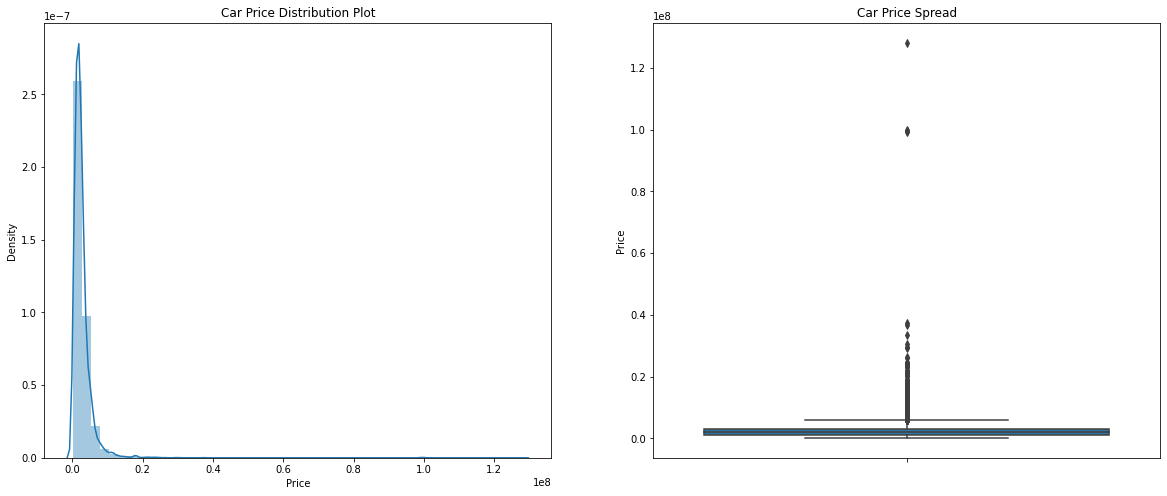

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.distplot(cars['Price'])

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=cars['Price'])

plt.show()

In [23]:
#The dataset shows crazy outliers in the data. Lets see what the observations are

cars[cars['Price']>50000000]

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
128,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,99205900.00,Duty not paid,Japan,Diesel,Automatic,21000,3000,4WD
2164,Volvo XC40 2018,Volvo,99779000.00,Duty not paid,Japan,Petrol,Automatic,41000,660,Unknown
2417,BMW 2 Series 2017,BMW,99706700.00,Duty not paid,Japan,Petrol,Automatic,44000,2000,Unknown
6311,Mercedes-Benz C-Class 2019,Mercedes-Benz,99717600.00,Duty not paid,Nairobi,Unknown,Automatic,65100,NA,Unknown
6557,Honda Shuttle 2016,Honda,128180000.00,Duty not paid,Kajiado,Unknown,Automatic,0,NA,Unknown


In [24]:
#The outliers are cars priced above Ksh 50,000,000. Are there any other cars of the same specifications in the dataset?
cars[cars['Car Title']=='Volvo XC40 2018']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2,Volvo XC40 2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
2164,Volvo XC40 2018,Volvo,99779000.00,Duty not paid,Japan,Petrol,Automatic,41000,660,Unknown


In [25]:
#There is another car that shares most of the attributes except price and engine capacity so that must be an error
#Lets change that
cars.at[2164,'Price']=9779000.0


In [26]:
#Lets also change the Engine capacity
cars.at[2164,'Engine Capacity']=2000

In [27]:
cars.iloc[[2164]]

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2164,Volvo XC40 2018,Volvo,9779000.00,Duty not paid,Japan,Petrol,Automatic,41000,2000,Unknown


In [28]:
cars[cars['Car Title']=='Mercedes-Benz GLE-Class 2020']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
128,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,99205900.00,Duty not paid,Japan,Diesel,Automatic,21000,3000,4WD
320,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,11751300.00,Duty not paid,Japan,Petrol,Automatic,65000,660,2WD
2617,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,12389100.00,Duty not paid,Japan,Petrol,Automatic,22000,1600,2WD
3210,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,11313600.00,Duty not paid,Japan,Petrol,Automatic,51000,660,2WD
5967,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,10855300.00,Duty not paid,Nairobi,Unknown,Automatic,98000,NA,Unknown
8670,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,12675400.00,Duty not paid,Japan,Petrol,Automatic,37000,660,Unknown
9016,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,14456400.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD


In [29]:
#Lets change the items 
cars.at[320,'Engine Capacity']=3000
cars.at[3210,'Engine Capacity']=3000
cars.at[2617,'Engine Capacity']=3000
cars.at[5967,'Engine Capacity']=3000
cars.at[8670,'Engine Capacity']=3000
cars.at[5967,'Drive Type']='4WD'
cars.at[8670,'Drive Type']='4WD'
cars.at[128,'Price']=9205900.00

In [30]:
cars[cars['Car Title']=='Mercedes-Benz GLE-Class 2020']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
128,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,9205900.00,Duty not paid,Japan,Diesel,Automatic,21000,3000,4WD
320,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,11751300.00,Duty not paid,Japan,Petrol,Automatic,65000,3000,2WD
2617,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,12389100.00,Duty not paid,Japan,Petrol,Automatic,22000,3000,2WD
3210,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,11313600.00,Duty not paid,Japan,Petrol,Automatic,51000,3000,2WD
5967,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,10855300.00,Duty not paid,Nairobi,Unknown,Automatic,98000,3000,4WD
8670,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,12675400.00,Duty not paid,Japan,Petrol,Automatic,37000,3000,4WD
9016,Mercedes-Benz GLE-Class 2020,Mercedes-Benz,14456400.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD


In [31]:
cars[cars['Car Title']=='BMW 2 Series 2017']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2289,BMW 2 Series 2017,BMW,1991100.00,Duty not paid,Japan,Petrol,Automatic,29000,660,2WD
2417,BMW 2 Series 2017,BMW,99706700.00,Duty not paid,Japan,Petrol,Automatic,44000,2000,Unknown
2488,BMW 2 Series 2017,BMW,2759100.00,Duty not paid,Japan,Hybrid,Automatic,3000,660,2WD
4035,BMW 2 Series 2017,BMW,2242240.00,Duty not paid,Japan,Diesel,Automatic,19000,2000,2WD
4339,BMW 2 Series 2017,BMW,2612120.00,Duty not paid,Japan,Hybrid,CVT,100000,2000,2WD
4722,BMW 2 Series 2017,BMW,2446730.00,Duty not paid,Japan,Hybrid,Automatic,17000,1800,Unknown
5927,BMW 2 Series 2017,BMW,3241900.00,Duty not paid,Kiambu,Unknown,Automatic,0,NA,Unknown
5968,BMW 2 Series 2017,BMW,2359550.00,Duty not paid,Kajiado,Unknown,Automatic,0,NA,Unknown


In [32]:
cars.at[2289,'Engine Capacity']=2000
cars.at[2488,'Engine Capacity']=2000
cars.at[5927,'Engine Capacity']=2000
cars.at[5968,'Engine Capacity']=2000
cars.at[2417,'Drive Type']='2WD'
cars.at[4722,'Drive Type']='2WD'
cars.at[5927,'Drive Type']='2WD'
cars.at[5968,'Drive Type']='2WD'
cars.at[2417,'Price']=2706700

In [33]:
cars[cars['Car Title']=='BMW 2 Series 2017']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2289,BMW 2 Series 2017,BMW,1991100.00,Duty not paid,Japan,Petrol,Automatic,29000,2000,2WD
2417,BMW 2 Series 2017,BMW,2706700.00,Duty not paid,Japan,Petrol,Automatic,44000,2000,2WD
2488,BMW 2 Series 2017,BMW,2759100.00,Duty not paid,Japan,Hybrid,Automatic,3000,2000,2WD
4035,BMW 2 Series 2017,BMW,2242240.00,Duty not paid,Japan,Diesel,Automatic,19000,2000,2WD
4339,BMW 2 Series 2017,BMW,2612120.00,Duty not paid,Japan,Hybrid,CVT,100000,2000,2WD
4722,BMW 2 Series 2017,BMW,2446730.00,Duty not paid,Japan,Hybrid,Automatic,17000,1800,2WD
5927,BMW 2 Series 2017,BMW,3241900.00,Duty not paid,Kiambu,Unknown,Automatic,0,2000,2WD
5968,BMW 2 Series 2017,BMW,2359550.00,Duty not paid,Kajiado,Unknown,Automatic,0,2000,2WD


In [34]:
cars[cars['Car Title']=='Mercedes-Benz C-Class 2019']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
752,Mercedes-Benz C-Class 2019,Mercedes-Benz,6569560.00,Duty not paid,Japan,Petrol,Automatic,85000,1300,Unknown
1364,Mercedes-Benz C-Class 2019,Mercedes-Benz,5613490.00,Duty not paid,Japan,Petrol,Automatic,57000,3600,4WD
2082,Mercedes-Benz C-Class 2019,Mercedes-Benz,5079330.00,Duty not paid,Japan,Petrol,Automatic,76000,1200,Unknown
2222,Mercedes-Benz C-Class 2019,Mercedes-Benz,4852170.00,Duty not paid,Japan,Petrol,Automatic,15000,2000,4WD
3167,Mercedes-Benz C-Class 2019,Mercedes-Benz,4918980.00,Duty not paid,Japan,Diesel,Manual,97100,1500,4WD
4207,Mercedes-Benz C-Class 2019,Mercedes-Benz,4545710.00,Duty not paid,Japan,Hybrid,CVT,100000,660,2WD
4271,Mercedes-Benz C-Class 2019,Mercedes-Benz,6196180.00,Duty not paid,Japan,Hybrid,Automatic,87000,1200,2WD
5477,Mercedes-Benz C-Class 2019,Mercedes-Benz,5097250.00,Duty not paid,Japan,Diesel,Automatic,15000,2000,2WD
6311,Mercedes-Benz C-Class 2019,Mercedes-Benz,99717600.00,Duty not paid,Nairobi,Unknown,Automatic,65100,NA,Unknown
8893,Mercedes-Benz C-Class 2019,Mercedes-Benz,11200200.00,Duty not paid,Japan,Petrol,Manual,45000,1600,Unknown


In [35]:
cars.at[752,'Drive Type']='2WD'
cars.at[2082,'Drive Type']='2WD'
cars.at[6311,'Drive Type']='4WD'
cars.at[8893,'Drive Type']='4WD'
cars.at[6311,'Engine Capacity']=1600
cars.at[4207,'Price']=1717600.00
cars.at[6311,'Engine Capacity']=1600

In [36]:
cars[cars['Car Title']=='Mercedes-Benz C-Class 2019']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
752,Mercedes-Benz C-Class 2019,Mercedes-Benz,6569560.00,Duty not paid,Japan,Petrol,Automatic,85000,1300,2WD
1364,Mercedes-Benz C-Class 2019,Mercedes-Benz,5613490.00,Duty not paid,Japan,Petrol,Automatic,57000,3600,4WD
2082,Mercedes-Benz C-Class 2019,Mercedes-Benz,5079330.00,Duty not paid,Japan,Petrol,Automatic,76000,1200,2WD
2222,Mercedes-Benz C-Class 2019,Mercedes-Benz,4852170.00,Duty not paid,Japan,Petrol,Automatic,15000,2000,4WD
3167,Mercedes-Benz C-Class 2019,Mercedes-Benz,4918980.00,Duty not paid,Japan,Diesel,Manual,97100,1500,4WD
4207,Mercedes-Benz C-Class 2019,Mercedes-Benz,1717600.00,Duty not paid,Japan,Hybrid,CVT,100000,660,2WD
4271,Mercedes-Benz C-Class 2019,Mercedes-Benz,6196180.00,Duty not paid,Japan,Hybrid,Automatic,87000,1200,2WD
5477,Mercedes-Benz C-Class 2019,Mercedes-Benz,5097250.00,Duty not paid,Japan,Diesel,Automatic,15000,2000,2WD
6311,Mercedes-Benz C-Class 2019,Mercedes-Benz,99717600.00,Duty not paid,Nairobi,Unknown,Automatic,65100,1600,4WD
8893,Mercedes-Benz C-Class 2019,Mercedes-Benz,11200200.00,Duty not paid,Japan,Petrol,Manual,45000,1600,4WD


In [37]:
cars[cars['Car Title']=='Honda Shuttle 2016']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2340,Honda Shuttle 2016,Honda,2028230.00,Duty not paid,Japan,Hybrid,Automatic,32000,1500,2WD
2401,Honda Shuttle 2016,Honda,1870070.00,Duty not paid,Japan,Petrol,Automatic,54500,660,2WD
3766,Honda Shuttle 2016,Honda,1628670.00,Duty not paid,Japan,Petrol,Automatic,11000,1800,Unknown
4963,Honda Shuttle 2016,Honda,1984990.00,Duty not paid,Japan,Petrol,Automatic,60000,2700,4WD
5295,Honda Shuttle 2016,Honda,1396850.00,Duty not paid,Japan,Petrol,Automatic,66000,2000,4WD
5464,Honda Shuttle 2016,Honda,1917820.00,Duty not paid,Japan,Hybrid,CVT,50000,660,2WD
5989,Honda Shuttle 2016,Honda,1360330.00,Duty not paid,Mombasa,Petrol,Automatic,98570,1400,Other
6557,Honda Shuttle 2016,Honda,128180000.00,Duty not paid,Kajiado,Unknown,Automatic,0,NA,Unknown
9269,Honda Shuttle 2016,Honda,1265810.00,Duty not paid,Japan,Petrol,Automatic,15000,1000,2WD
9272,Honda Shuttle 2016,Honda,1177820.00,Duty not paid,Japan,Petrol,Automatic,20000,2000,2WD


In [38]:
cars.at[3766,'Drive Type']='2WD'
cars.at[6557,'Drive Type']='2WD'
cars.at[5989,'Drive Type']='2WD'
cars.at[9990,'Engine Capacity']=1500
cars.at[6557,'Engine Capacity']=1500
cars.at[5464,'Engine Capacity']=1500
cars.at[2401,'Engine Capacity']=1500
cars.at[9269,'Engine Capacity']=1500
cars.at[6557,'Price']=1281800.00
cars.at[6557,'Fuel Type']='Petrol'

In [39]:
cars[cars['Car Title']=='Honda Shuttle 2016']

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2340,Honda Shuttle 2016,Honda,2028230.00,Duty not paid,Japan,Hybrid,Automatic,32000,1500,2WD
2401,Honda Shuttle 2016,Honda,1870070.00,Duty not paid,Japan,Petrol,Automatic,54500,1500,2WD
3766,Honda Shuttle 2016,Honda,1628670.00,Duty not paid,Japan,Petrol,Automatic,11000,1800,2WD
4963,Honda Shuttle 2016,Honda,1984990.00,Duty not paid,Japan,Petrol,Automatic,60000,2700,4WD
5295,Honda Shuttle 2016,Honda,1396850.00,Duty not paid,Japan,Petrol,Automatic,66000,2000,4WD
5464,Honda Shuttle 2016,Honda,1917820.00,Duty not paid,Japan,Hybrid,CVT,50000,1500,2WD
5989,Honda Shuttle 2016,Honda,1360330.00,Duty not paid,Mombasa,Petrol,Automatic,98570,1400,2WD
6557,Honda Shuttle 2016,Honda,1281800.00,Duty not paid,Kajiado,Petrol,Automatic,0,1500,2WD
9269,Honda Shuttle 2016,Honda,1265810.00,Duty not paid,Japan,Petrol,Automatic,15000,1500,2WD
9272,Honda Shuttle 2016,Honda,1177820.00,Duty not paid,Japan,Petrol,Automatic,20000,2000,2WD


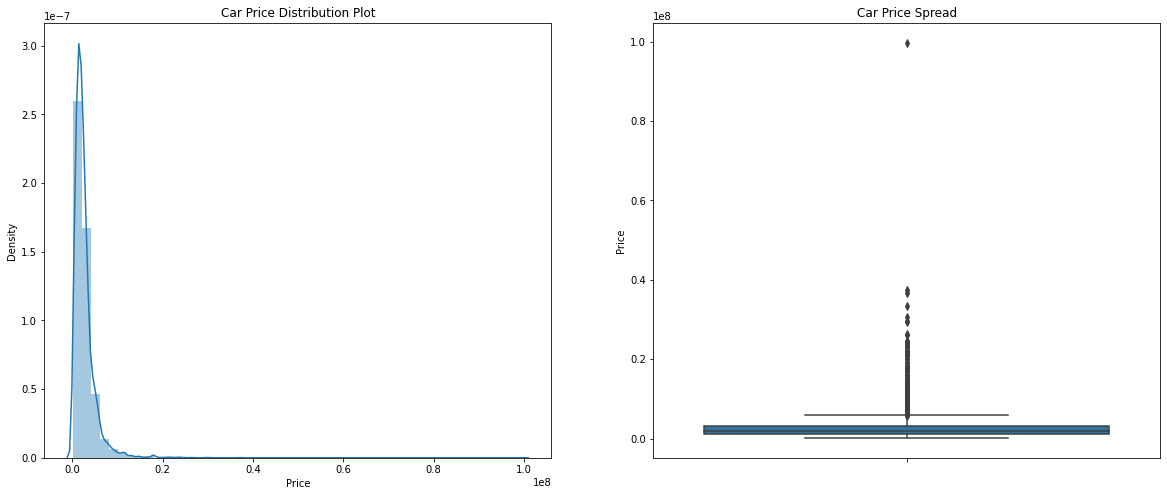

In [40]:
#Now lets try to visualize the distribution of prices again 
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.distplot(cars['Price'])

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=cars['Price'])

plt.show()

In [41]:
#We still have an outlier showing a car price over 100,000,000. Lets check it out
cars[cars['Price']>90000000]

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
6311,Mercedes-Benz C-Class 2019,Mercedes-Benz,99717600.00,Duty not paid,Nairobi,Unknown,Automatic,65100,1600,4WD


In [42]:
cars.at[6311,'Price']=9971760.00

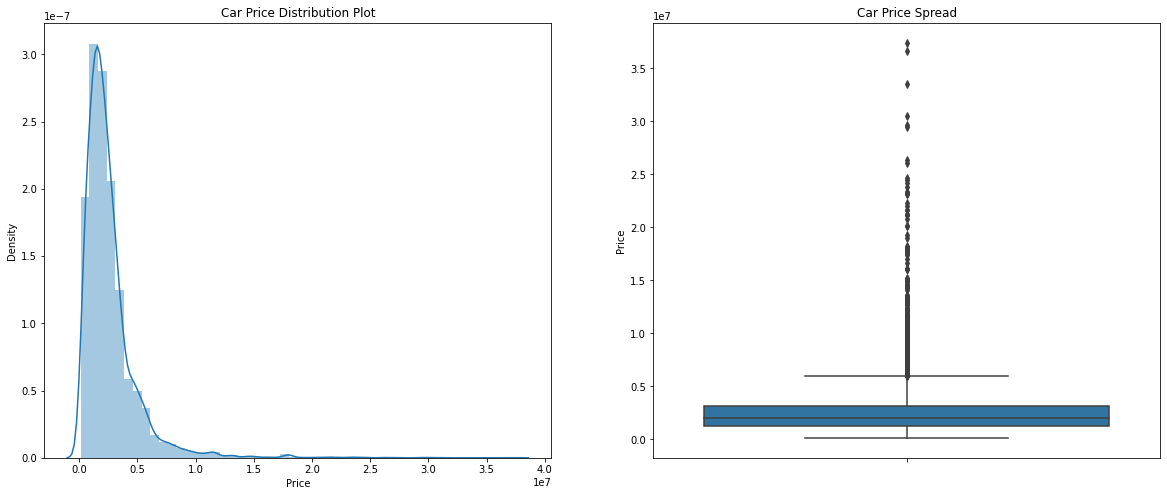

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution Plot")
sns.distplot(cars['Price'])

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=cars['Price'])

plt.show()

In [44]:
#Now the spread and the distribution reflects real world prices a bit more closely
#Lets create an additional column for the year of manufacture
#Lets create a new column with the car brand gleaned from the car title column
# carYearofRelease=cars['Car Title'].apply(lambda x:x.split(' ')[-1])
# cars.insert(1,"Year",carYearofRelease)
cars.head()

,Car Title,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,Honda,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,Toyota,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,Toyota,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [45]:
cars.drop(['Year'],axis=1,inplace=True)

KeyError: "['Year'] not found in axis"

In [46]:
#Now the spread and the distribution reflects real world prices a bit more closely
#Lets create an additional column for the year of manufacture
# Lets create a new column with the car brand gleaned from the car title column
carYearofRelease=cars['Car Title'].apply(lambda x:x.split(' ')[-1])
cars.insert(1,"Year",carYearofRelease)
cars.head()

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,2016,Honda,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,2015,Toyota,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,2019,Toyota,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [47]:
cars.head()

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,2016,Honda,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,Unknown
2,Volvo XC40 2018,2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,2015,Toyota,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,2019,Toyota,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [48]:
cars.at[1,'Drive Type']='4WD'

In [49]:
cars.head()

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,2016,Honda,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,4WD
2,Volvo XC40 2018,2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,2015,Toyota,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,2019,Toyota,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [50]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,1]))

count       9996.00
mean     2612066.64
std      2433215.33
min       130000.00
25%      1250000.00
50%      2011835.00
75%      3154350.00
100%    37425700.00
max     37425700.00
Name: Price, dtype: float64


In [51]:
#In the dataset we also have a min of 130,000. Is that possible? Lets check it out
cars[cars['Price']==130000]

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
5875,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Nairobi,Unknown,Automatic,73000,NA,Unknown
6057,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Japan,Petrol,Automatic,4000,1500,Unknown
6104,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Japan,Hybrid,CVT,0,660,2WD
6451,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Mombasa,Unknown,Automatic,58000,1500,Unknown
6636,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Mombasa,Petrol,Automatic,58000,1500,Other
6864,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Japan,Petrol,Automatic,77000,660,Unknown
7058,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Mombasa,Unknown,Automatic,0,NA,Unknown
7097,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Kajiado,Unknown,Automatic,0,NA,Unknown
7101,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Nairobi,Unknown,Automatic,95000,NA,Unknown
7211,Mitsubishi Canter 2004,2004,Mitsubishi,130000.00,Duty paid,Samburu,Unknown,Manual,220122,NA,Unknown


In [52]:
#Upon checking the original website, only one canter exists and we are going to remove the others
cars.at[8278,'Price']=1300000

In [53]:
cars.drop(cars[cars.Price==130000].index,inplace=True)

In [54]:
cars.head()

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
1,Honda VEZEL 2016,2016,Honda,1925730.00,Duty not paid,Japan,Petrol,Automatic,28000,1500,4WD
2,Volvo XC40 2018,2018,Volvo,5513650.00,Duty not paid,Japan,Petrol,Automatic,25000,2000,4WD
3,Toyota Hiace Van 2015,2015,Toyota,3225870.00,Duty not paid,Japan,Diesel,Automatic,104000,3000,2WD
4,Toyota Sienna 2019,2019,Toyota,6365780.00,Duty not paid,Japan,Petrol,Automatic,33000,3500,2WD


In [55]:
cars[cars['Car Title']=='Suzuki Carry Truck 2020']

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,660,4WD
484,Suzuki Carry Truck 2020,2020,Suzuki,1067560.00,Duty not paid,Japan,Petrol,Automatic,39000,2000,2WD
1679,Suzuki Carry Truck 2020,2020,Suzuki,1297570.00,Duty not paid,Japan,Petrol,Automatic,15000,660,4WD
3840,Suzuki Carry Truck 2020,2020,Suzuki,2476300.00,Duty not paid,Japan,Hybrid,Automatic,21000,2500,2WD
3884,Suzuki Carry Truck 2020,2020,Suzuki,3378260.00,Duty not paid,Japan,Petrol,Automatic,39000,1500,2WD
5503,Suzuki Carry Truck 2020,2020,Suzuki,1302150.00,Duty not paid,Japan,Diesel,Automatic,13000,2000,2WD
7601,Suzuki Carry Truck 2020,2020,Suzuki,1496170.00,Duty not paid,Japan,Petrol,Other,11000,660,Unknown


In [56]:
cars.at[7601,'Drive Type']='4WD'
cars.at[484,'Engine Capacity']=1500
cars.at[1679,'Engine Capacity']=1500
cars.at[3840,'Engine Capacity']=1500
cars.at[3884,'Engine Capacity']=1500
cars.at[5503,'Engine Capacity']=1500
cars.at[0,'Engine Capacity']=1500
cars.at[7601,'Engine Capacity']=1500
cars.at[7601,'Transmission']='Automatic'

In [57]:
cars[cars['Car Title']=='Suzuki Carry Truck 2020']

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,Suzuki Carry Truck 2020,2020,Suzuki,1708980.00,Duty not paid,Japan,Petrol,Automatic,3400,1500,4WD
484,Suzuki Carry Truck 2020,2020,Suzuki,1067560.00,Duty not paid,Japan,Petrol,Automatic,39000,1500,2WD
1679,Suzuki Carry Truck 2020,2020,Suzuki,1297570.00,Duty not paid,Japan,Petrol,Automatic,15000,1500,4WD
3840,Suzuki Carry Truck 2020,2020,Suzuki,2476300.00,Duty not paid,Japan,Hybrid,Automatic,21000,1500,2WD
3884,Suzuki Carry Truck 2020,2020,Suzuki,3378260.00,Duty not paid,Japan,Petrol,Automatic,39000,1500,2WD
5503,Suzuki Carry Truck 2020,2020,Suzuki,1302150.00,Duty not paid,Japan,Diesel,Automatic,13000,1500,2WD
7601,Suzuki Carry Truck 2020,2020,Suzuki,1496170.00,Duty not paid,Japan,Petrol,Automatic,11000,1500,4WD


In [58]:
#Which are the most popular car brands
cars['Brand'].value_counts()

Toyota           3358
Nissan           1272
Honda             985
Suzuki            865
Daihatsu          647
BMW               424
Mazda             403
Subaru            383
Mercedes-Benz     326
Mitsubishi        250
Lexus             218
Mini              151
Volkswagen        128
Audi              121
Land               63
Volvo              61
Isuzu              36
Fiat               35
Hino               31
Porsche            30
Jeep               28
Peugeot            25
Chrysler           22
Renault            18
Citroen            16
Hyundai            15
Cadillac           11
Jaguar              8
Rover               7
Alfa                6
Ford                5
Chevrolet           4
Smart               4
Abarth              3
Maserati            3
Others              2
Ferrari             2
Lamborghini         2
Dodge               2
Rolls-Royce         2
Aston               1
McLaren             1
Bentley             1
Tesla               1
Caterham            1
GMC       

<AxesSubplot:>

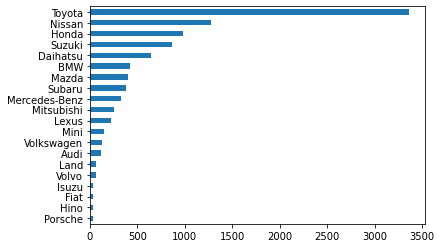

In [59]:
cars['Brand'].value_counts(ascending=True).tail(20).plot(kind='barh')

<AxesSubplot:>

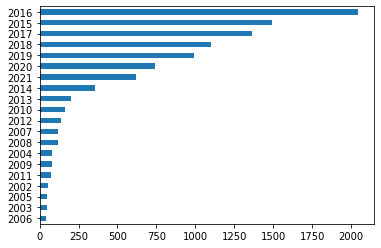

In [60]:
#Lets filter by year and give the most popular year of manufacture
cars['Year'].value_counts(ascending=True).tail(20).plot(kind='barh')

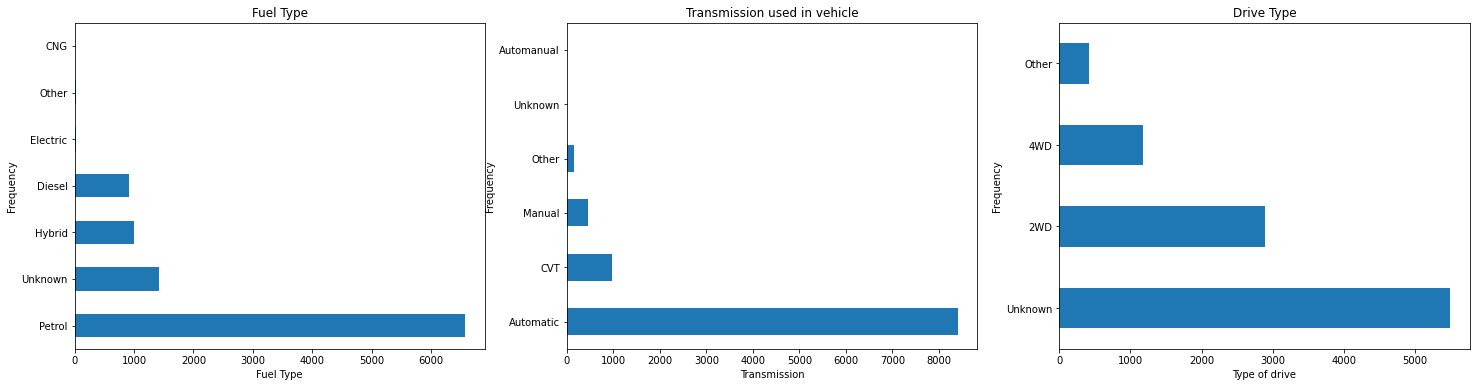

In [61]:
#Lets visualize how categorical variables affect the dataset
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=cars['Fuel Type'].value_counts().plot(kind='barh')
plt.title('Fuel Type')
plt1.set(xlabel='Fuel Type',ylabel='Frequency')

plt.subplot(1,3,2)
plt1=cars['Transmission'].value_counts().plot(kind='barh')
plt.title('Transmission used in vehicle')
plt1.set(xlabel='Transmission',ylabel='Frequency')

plt.subplot(1,3,3)
plt1=cars['Drive Type'].value_counts().plot(kind='barh')
plt.title('Drive Type')
plt1.set(xlabel='Type of drive',ylabel='Frequency')

plt.show()

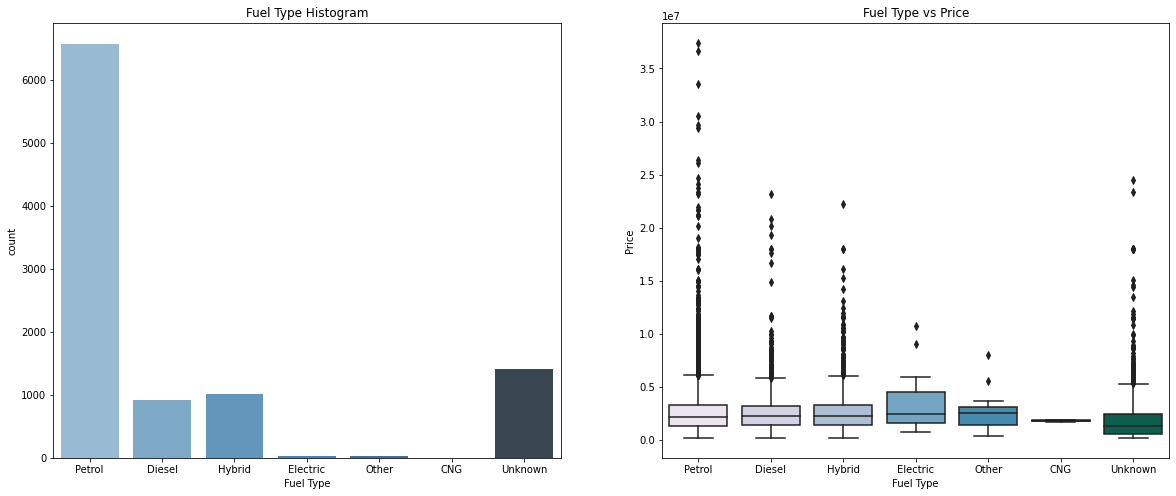

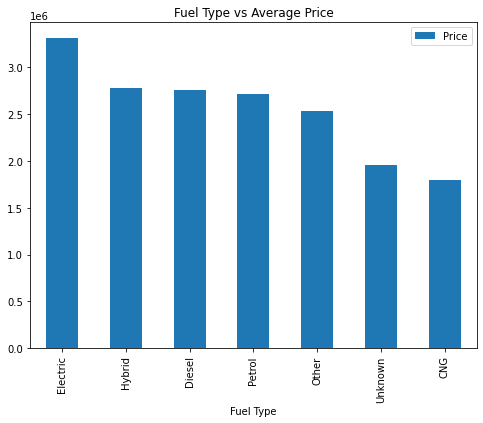

In [62]:
#Lets explore how these variables line up against the price
     

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(cars['Fuel Type'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=cars['Fuel Type'], y=cars['Price'], palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['Fuel Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()



<Figure size 1800x432 with 0 Axes>

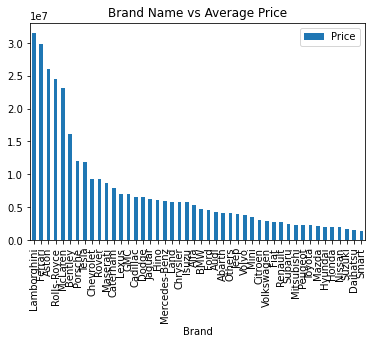

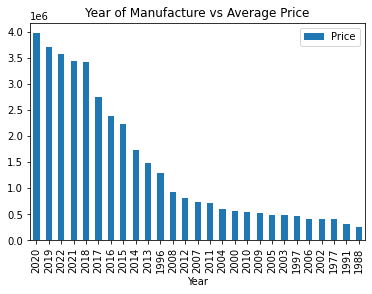

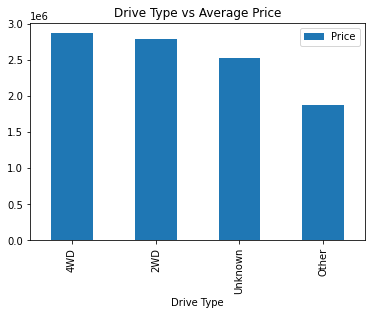

In [63]:
# Lets explore the price vs the brand of the car
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['Brand'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Year'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Year of Manufacture vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Drive Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Drive Type vs Average Price')

plt.show()

### Let us now visualize numerical data

ValueError: could not convert string to float: 'NA'

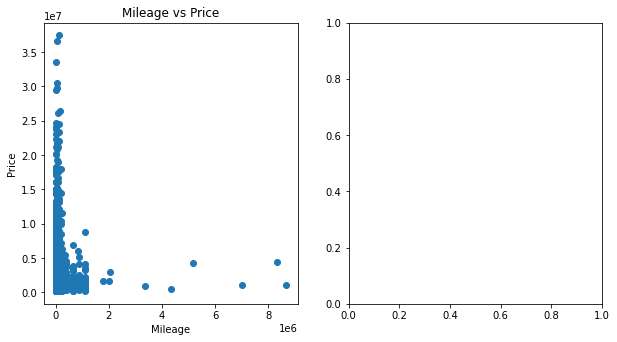

In [64]:


def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,30))

scatter('Mileage',1)
scatter('Engine Capacity',2)


plt.tight_layout()



### Mileage and engine capacity dont show any correlation with price

In [65]:
cars.at[2251,'Engine Capacity']=2000

In [66]:
cars['Engine Capacity'].value_counts()

660     2215
2000    1609
NA      1352
1500    1291
2500     473
        ... 
1360       1
2982       1
1320       1
4500       1
3300       1
Name: Engine Capacity, Length: 100, dtype: int64

In [67]:
cars['Engine Capacity']=cars['Engine Capacity'].replace('NA',1800)

In [68]:
cars['Engine Capacity']=cars['Engine Capacity'].replace('660',1300)

In [69]:
cars['Engine Capacity']=cars['Engine Capacity'].astype(int)

In [70]:
cars[cars['Engine Capacity']>12000]

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
2053,Honda Freed 2020,2020,Honda,2871920.00,Duty not paid,Japan,Diesel,Manual,239000,12910,Unknown
2068,Nissan Serena 2017,2017,Nissan,2225050.00,Duty not paid,Japan,Diesel,Manual,255000,12910,Unknown
3879,Honda Fit 2019,2019,Honda,1496690.00,Duty not paid,Japan,Diesel,Automatic,668000,12910,Unknown
4172,Honda N-BOX 2016,2016,Honda,1367780.00,Duty not paid,Japan,Diesel,Manual,747000,12910,Unknown
5006,Mazda CX-5 2015,2015,Mazda,2247510.00,Duty not paid,Japan,Diesel,Other,783000,12770,Unknown


In [71]:
#There are some big outliers with engine capacity. Lets find a way to change them
cars.at[5006,'Engine Capacity']=2200
cars.at[2053,'Engine Capacity']=1500
cars.at[2068,'Engine Capacity']=2000
cars.at[3879,'Engine Capacity']=1300
cars.at[4172,'Engine Capacity']=660
cars.at[5006,'Drive Type']='4WD'
cars.at[2053,'Drive Type']='2WD'
cars.at[2068,'Drive Type']='2WD'
cars.at[3879,'Drive Type']='2WD'
cars.at[4172,'Drive Type']='2WD'

In [72]:
cars[cars['Engine Capacity']>7000]

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
227,Audi A3 2016,2016,Audi,1612110.00,Duty not paid,Japan,Diesel,Manual,365300,7790,Unknown
642,Suzuki Jimny 2020,2020,Suzuki,2805650.00,Duty not paid,Japan,Diesel,Unknown,90000,7790,Unknown
2661,Honda N-BOX 2018,2018,Honda,1803590.00,Duty not paid,Japan,Diesel,Manual,570000,8860,2WD
5788,Toyota Fielder 2016,2016,Toyota,1200000.00,Duty paid,Japan,Petrol,Automatic,9000,8400,Unknown
6881,Toyota Vanguard 2014,2014,Toyota,2650000.00,Duty paid,Japan,Diesel,Manual,324400,9830,4WD
8287,Toyota Noah 2014,2014,Toyota,1800000.00,Duty paid,Japan,Diesel,Manual,947600,9800,Unknown
8570,Toyota Tank 2019,2019,Toyota,1931140.00,Duty not paid,Japan,Diesel,Manual,37800,7010,2WD
9453,Toyota Prius 2016,2016,Toyota,2188930.00,Duty not paid,Japan,Diesel,Manual,567000,8860,Unknown


In [73]:
cars.at[2661,'Engine Capacity']=660
cars.at[227,'Engine Capacity']=1800
cars.at[642,'Engine Capacity']=1500
cars.at[5788,'Engine Capacity']=1500
cars.at[6881,'Engine Capacity']=1500
cars.at[8287,'Engine Capacity']=2000
cars.at[8570,'Engine Capacity']=1000
cars.at[9453,'Engine Capacity']=1800
cars.at[227,'Drive Type']='2WD'
cars.at[642,'Drive Type']='2WD'
cars.at[5788,'Drive Type']='2WD'
cars.at[8287,'Drive Type']='4WD'
cars.at[9453,'Drive Type']='2WD'

In [74]:
cars[cars['Engine Capacity']>6000]

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
415,Nissan Serena 2016,2016,Nissan,2911930.00,Duty not paid,Japan,Petrol,Automatic,19000,6200,4WD
1641,Nissan Elgrand 2017,2017,Nissan,5802100.00,Duty not paid,Japan,Petrol,Automatic,23000,6400,2WD
3306,Subaru Impreza 2016,2016,Subaru,1208850.00,Duty not paid,Japan,Diesel,Manual,156000,6400,Unknown
4121,Toyota Hiace Wagon 2018,2018,Toyota,5933540.00,Duty not paid,Japan,Hybrid,Automatic,20000,6700,2WD
5130,Daihatsu Move 2016,2016,Daihatsu,1073100.00,Duty not paid,Japan,Petrol,Automatic,30000,6150,Unknown
5736,Toyota Probox 2012,2012,Toyota,520000.00,Duty paid,Japan,Petrol,Automatic,26000,6600,Unknown
9291,Honda N-BOX 2015,2015,Honda,1558500.00,Duty not paid,Japan,Petrol,Automatic,12300,6600,Unknown
9774,Honda N-ONE 2017,2017,Honda,1096560.00,Duty not paid,Japan,Petrol,Automatic,17000,6150,4WD


In [75]:
cars.at[9291,'Engine Capacity']=660
cars.at[415,'Engine Capacity']=2000
cars.at[1641,'Engine Capacity']=2500
cars.at[3306,'Engine Capacity']=1600
cars.at[4121,'Engine Capacity']=2700
cars.at[5130,'Engine Capacity']=660
cars.at[5736,'Engine Capacity']=1500
cars.at[9774,'Engine Capacity']=660
cars.at[9291,'Drive Type']='2WD'
cars.at[3306,'Drive Type']='2WD'
cars.at[5130,'Drive Type']='2WD'
cars.at[5736,'Drive Type']='2WD'

In [76]:
cars[cars['Engine Capacity']>5000]

,Car Title,Year,Brand,Price,Duty Status,Location,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
26,Isuzu Forward 2016,2016,Isuzu,6299180.00,Duty not paid,Japan,Diesel,Manual,254000,5190,Unknown
361,Suzuki Alto Lapin 2019,2019,Suzuki,1378080.00,Duty not paid,Japan,Petrol,Automatic,42000,5700,4WD
412,Toyota Hiace Van 2016,2016,Toyota,2495940.00,Duty not paid,Japan,Diesel,Manual,79900,5120,Unknown
1387,Toyota Hiace Van 2018,2018,Toyota,4562350.00,Duty not paid,Japan,Diesel,Manual,82000,5200,2WD
1989,BMW X1 2016,2016,BMW,3174430.00,Duty not paid,Japan,Petrol,Automatic,2000,5700,4WD
2140,Nissan X-Trail 2017,2017,Nissan,3097220.00,Duty not paid,Japan,Diesel,Manual,13000,5190,Unknown
2237,Toyota RAV4 2019,2019,Toyota,5065090.00,Duty not paid,Japan,Diesel,Manual,283000,5190,Unknown
2634,Daihatsu Tanto 2015,2015,Daihatsu,753658.00,Duty not paid,Japan,Diesel,Manual,6000,5190,Unknown
2687,Suzuki Hustler 2020,2020,Suzuki,1828780.00,Duty not paid,Japan,Diesel,Manual,34637,5200,2WD
3231,Honda N-WGN 2015,2015,Honda,1173480.00,Duty not paid,Japan,Petrol,Automatic,8000,5700,4WD


In [77]:
cars.at[361,'Engine Capacity']=660
cars.at[412,'Engine Capacity']=3000
cars.at[1387,'Engine Capacity']=3000
cars.at[1989,'Engine Capacity']=2000
cars.at[2140,'Engine Capacity']=2000
cars.at[2237,'Engine Capacity']=2000
cars.at[2634,'Engine Capacity']=660
cars.at[2687,'Engine Capacity']=660
cars.at[3231,'Engine Capacity']=660
cars.at[3249,'Engine Capacity']=1400
cars.at[3308,'Engine Capacity']=1400
cars.at[3404,'Engine Capacity']=4000
cars.at[3609,'Engine Capacity']=2000
cars.at[3832,'Engine Capacity']=2700
cars.at[4208,'Engine Capacity']=660
cars.at[4594,'Engine Capacity']=2700
cars.at[4744,'Engine Capacity']=1800
cars.at[4838,'Engine Capacity']=660
cars.at[4853,'Engine Capacity']=1300
cars.at[4979,'Engine Capacity']=1500
cars.at[5421,'Engine Capacity']=2500
cars.at[5433,'Engine Capacity']=1200
cars.at[6223,'Engine Capacity']=1300
cars.at[6477,'Engine Capacity']=1200
cars.at[6596,'Engine Capacity']=1000
cars.at[6651,'Engine Capacity']=3000
cars.at[8417,'Engine Capacity']=2000
cars.at[8574,'Engine Capacity']=4600
cars.at[9090,'Engine Capacity']=1500
cars.at[9138,'Engine Capacity']=2500
cars.at[9366,'Engine Capacity']=1500
cars.at[9426,'Engine Capacity']=1200
cars.at[9524,'Engine Capacity']=3000
cars.at[9525,'Engine Capacity']=3000
cars.at[9646,'Engine Capacity']=1200
cars.at[9764,'Engine Capacity']=2000
cars.at[26,'Drive Type']='4WD'
cars.at[412,'Drive Type']='4WD'
cars.at[2140,'Drive Type']='4WD'
cars.at[2237,'Drive Type']='4WD'
cars.at[2634,'Drive Type']='2WD'
cars.at[3249,'Drive Type']='4WD'
cars.at[3308,'Drive Type']='4WD'
cars.at[4208,'Drive Type']='2WD'
cars.at[4594,'Drive Type']='2WD'
cars.at[4744,'Drive Type']='4WD'
cars.at[5433,'Drive Type']='2WD'
cars.at[6223,'Drive Type']='2WD'
cars.at[6477,'Drive Type']='2WD'
cars.at[6651,'Drive Type']='4WD'
cars.at[8417,'Drive Type']='2WD'
cars.at[9138,'Drive Type']='2WD'
cars.at[9646,'Drive Type']='2WD'

In [78]:
cars['Drive Type']=cars['Drive Type'].apply(lambda x:x.replace("Unknown","2WD"))
cars['Drive Type']=cars['Drive Type'].apply(lambda x:x.replace("Other","AWD"))

In [79]:
cars.dtypes

Car Title           object
Year                object
Brand               object
Price              float64
Duty Status         object
Location            object
Fuel Type           object
Transmission        object
Mileage              int64
Engine Capacity      int64
Drive Type          object
dtype: object

In [80]:
#Lets make our object variables into categorical variables
cars['Duty Status']=cars['Duty Status'].astype('category')
cars['Drive Type']=cars['Drive Type'].astype('category')
cars['Transmission']=cars['Transmission'].astype('category')
cars['Fuel Type']=cars['Fuel Type'].astype('category')

In [81]:
cars['Drive Type'].value_counts()

2WD    8370
4WD    1190
AWD     418
Name: Drive Type, dtype: int64

## Lets prepare the variables for modelling

In [82]:
cars_lr=cars[['Price','Year','Brand','Duty Status','Fuel Type',
              'Transmission','Mileage','Engine Capacity','Drive Type']]
cars_lr.head()

,Price,Year,Brand,Duty Status,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,1708980.00,2020,Suzuki,Duty not paid,Petrol,Automatic,3400,1500,4WD
1,1925730.00,2016,Honda,Duty not paid,Petrol,Automatic,28000,1500,4WD
2,5513650.00,2018,Volvo,Duty not paid,Petrol,Automatic,25000,2000,4WD
3,3225870.00,2015,Toyota,Duty not paid,Diesel,Automatic,104000,3000,2WD
4,6365780.00,2019,Toyota,Duty not paid,Petrol,Automatic,33000,3500,2WD


In [83]:
cars_lr

,Price,Year,Brand,Duty Status,Fuel Type,Transmission,Mileage,Engine Capacity,Drive Type
0,1708980.00,2020,Suzuki,Duty not paid,Petrol,Automatic,3400,1500,4WD
1,1925730.00,2016,Honda,Duty not paid,Petrol,Automatic,28000,1500,4WD
2,5513650.00,2018,Volvo,Duty not paid,Petrol,Automatic,25000,2000,4WD
3,3225870.00,2015,Toyota,Duty not paid,Diesel,Automatic,104000,3000,2WD
4,6365780.00,2019,Toyota,Duty not paid,Petrol,Automatic,33000,3500,2WD
...,...,...,...,...,...,...,...,...,...
9991,5522860.00,2017,Mercedes-Benz,Duty not paid,Petrol,Automatic,12000,1000,2WD
9992,1791950.00,2016,Subaru,Duty not paid,Petrol,Automatic,23000,1300,2WD
9993,3612860.00,2021,Toyota,Duty not paid,Petrol,Automatic,0,1300,4WD
9994,1894800.00,2018,Toyota,Duty not paid,Petrol,Automatic,0,1300,2WD


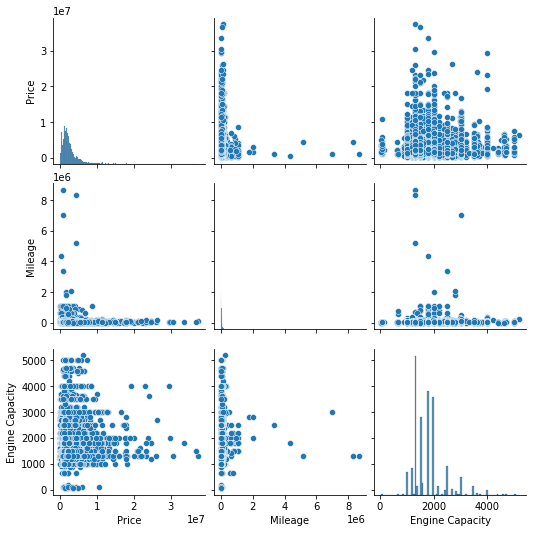

In [84]:
sns.pairplot(cars_lr)
plt.show()

In [109]:
#Lets create dummy variables from the categorical variables to make them easier to use
cat_columns=['Fuel Type','Transmission','Drive Type','Duty Status']
data_cars=pd.concat((cars_lr,pd.get_dummies(cars_lr,columns=['Fuel Type','Transmission','Drive Type','Duty Status','Brand'],drop_first=True)),axis=1)
data_cars.drop(['Fuel Type','Transmission','Drive Type','Duty Status','Brand'],axis=1,inplace=True)

In [110]:
data_cars.head()

,Price,Year,Mileage,Engine Capacity,Price,Year,Mileage,Engine Capacity,Fuel Type_Diesel,Fuel Type_Electric,...,Brand_Renault,Brand_Rolls-Royce,Brand_Rover,Brand_Smart,Brand_Subaru,Brand_Suzuki,Brand_Tesla,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,1708980.00,2020,3400,1500,1708980.00,2020,3400,1500,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1925730.00,2016,28000,1500,1925730.00,2016,28000,1500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5513650.00,2018,25000,2000,5513650.00,2018,25000,2000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3225870.00,2015,104000,3000,3225870.00,2015,104000,3000,1,0,...,0,0,0,0,0,0,0,1,0,0
4,6365780.00,2019,33000,3500,6365780.00,2019,33000,3500,0,0,...,0,0,0,0,0,0,0,1,0,0


## Modelling Building

In [111]:
# import libraries
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(data_cars,train_size=0.7,test_size=0.3,random_state=100)

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
num_vars=['Price','Mileage','Engine Capacity']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [113]:
df_train.head()

,Price,Year,Mileage,Engine Capacity,Price,Year,Mileage,Engine Capacity,Fuel Type_Diesel,Fuel Type_Electric,...,Brand_Renault,Brand_Rolls-Royce,Brand_Rover,Brand_Smart,Brand_Subaru,Brand_Suzuki,Brand_Tesla,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
9297,0.07,2021,0.00,0.48,0.07,2021,0.00,0.48,0,0,...,0,0,0,0,0,1,0,0,0,0
8314,0.03,2014,0.00,0.77,0.03,2014,0.00,0.77,0,0,...,0,0,0,0,0,0,0,1,0,0
35,0.09,2017,0.00,0.30,0.09,2017,0.00,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
551,0.07,2016,0.00,0.18,0.07,2016,0.00,0.18,0,0,...,0,0,0,0,0,0,0,1,0,0
8692,0.12,2018,0.01,0.89,0.12,2018,0.01,0.89,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df_train.describe()

,Price,Mileage,Engine Capacity,Price,Mileage,Engine Capacity,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Other,...,Brand_Renault,Brand_Rolls-Royce,Brand_Rover,Brand_Smart,Brand_Subaru,Brand_Suzuki,Brand_Tesla,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
count,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,...,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00,6984.00
mean,0.07,0.01,0.33,0.07,0.01,0.33,0.09,0.00,0.10,0.00,...,0.00,0.00,0.00,0.00,0.04,0.09,0.00,0.33,0.01,0.01
std,0.07,0.02,0.12,0.07,0.02,0.12,0.29,0.06,0.31,0.05,...,0.04,0.02,0.03,0.01,0.19,0.28,0.01,0.47,0.11,0.07
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,0.00,0.24,0.03,0.00,0.24,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.05,0.00,0.34,0.05,0.00,0.34,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.08,0.01,0.38,0.08,0.01,0.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


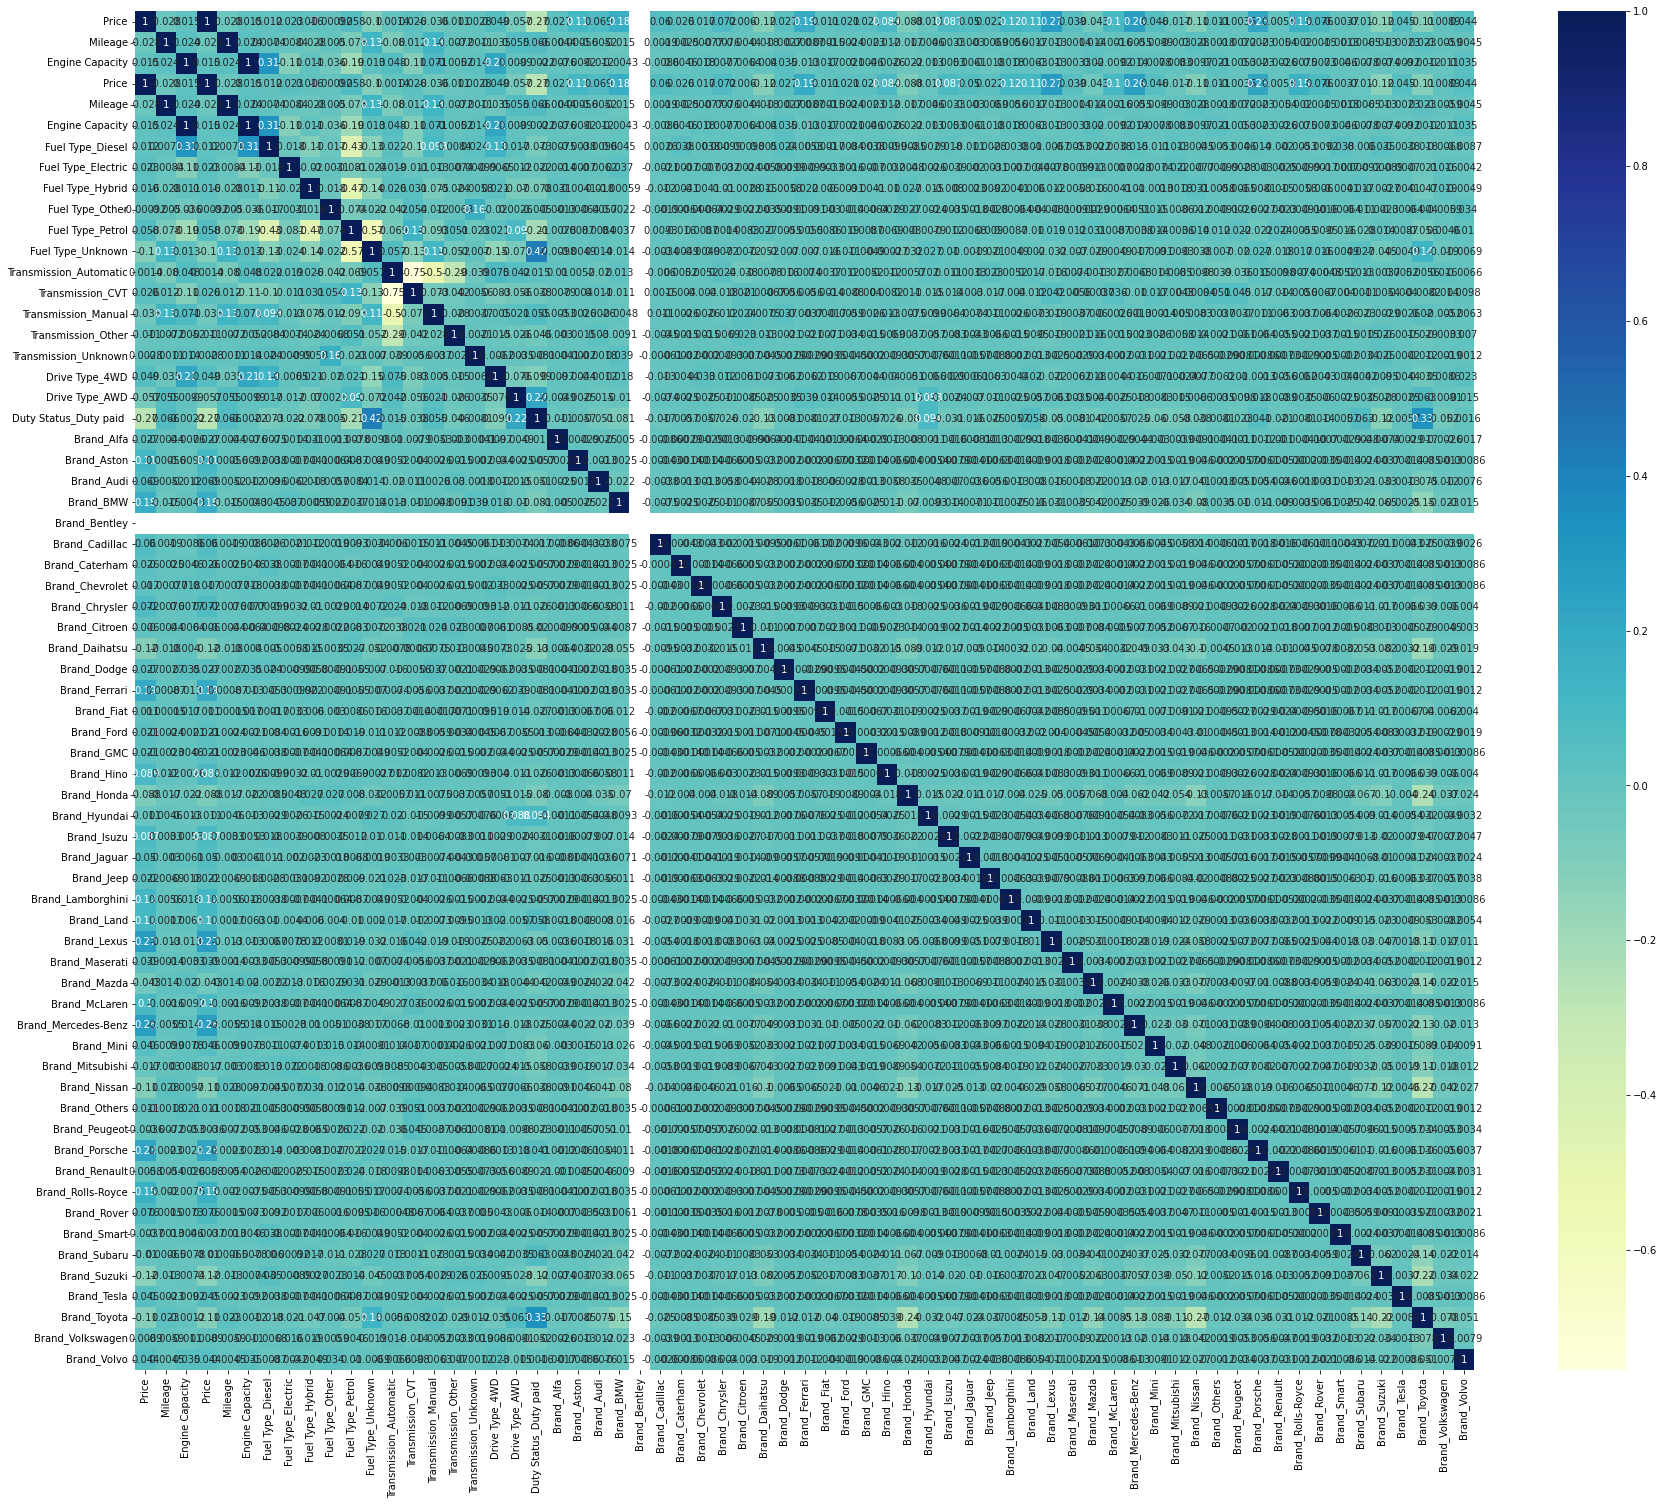

In [115]:
#Lets build a correlation heatmap
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [116]:
#We have at best very low correlations
#Dividing data into X and y variables
y_train=df_train.pop('Price')
X_train=df_train

In [117]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
#selecting number of features to select and fitting the regression
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [122]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 14),
 ('Mileage', False, 11),
 ('Engine Capacity', False, 13),
 ('Year', False, 16),
 ('Mileage', False, 12),
 ('Engine Capacity', False, 15),
 ('Fuel Type_Diesel', False, 38),
 ('Fuel Type_Electric', False, 33),
 ('Fuel Type_Hybrid', False, 36),
 ('Fuel Type_Other', False, 34),
 ('Fuel Type_Petrol', False, 35),
 ('Fuel Type_Unknown', False, 37),
 ('Transmission_Automatic', False, 27),
 ('Transmission_CVT', False, 26),
 ('Transmission_Manual', False, 28),
 ('Transmission_Other', False, 29),
 ('Transmission_Unknown', False, 30),
 ('Drive Type_4WD', False, 54),
 ('Drive Type_AWD', False, 56),
 ('Duty Status_Duty paid ', False, 45),
 ('Brand_Alfa', False, 20),
 ('Brand_Aston', True, 1),
 ('Brand_Audi', False, 24),
 ('Brand_BMW', False, 22),
 ('Brand_Bentley', False, 17),
 ('Brand_Cadillac', False, 4),
 ('Brand_Caterham', True, 1),
 ('Brand_Chevrolet', False, 19),
 ('Brand_Chrysler', False, 18),
 ('Brand_Citroen', False, 47),
 ('Brand_Daihatsu', False, 31),
 ('Brand_Dodge'

In [123]:
X_train.columns[rfe.support_]

Index(['Brand_Aston', 'Brand_Caterham', 'Brand_Ferrari', 'Brand_Lamborghini',
       'Brand_Maserati', 'Brand_McLaren', 'Brand_Porsche', 'Brand_Rolls-Royce',
       'Brand_Rover', 'Brand_Tesla'],
      dtype='object')

In [ ]:
#The features selected to fit the model are mostly brands of the cars and from the paiwise plot the correlation is very low

In [134]:
#lets build model using statsmodel for detailed stats
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.shape

(6984, 10)

In [135]:
y_train.shape

(6984, 2)

In [128]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)



In [136]:
#X_train_new=build_model(X_train_rfe,y_train)